Loaded preprocessed data: (284807, 33)
Train shape: (227845, 33) Test shape: (56962, 33)
Logistic Regression PR-AUC: 0.7184
Top Logistic Regression Coefficients:
 Amount    2.510983
V14      -1.543874
V20      -1.221676
V12      -1.181760
V28       1.164264
V17      -1.150197
V10      -1.143755
V16      -1.099908
V5        0.969324
V4        0.933348
dtype: float64


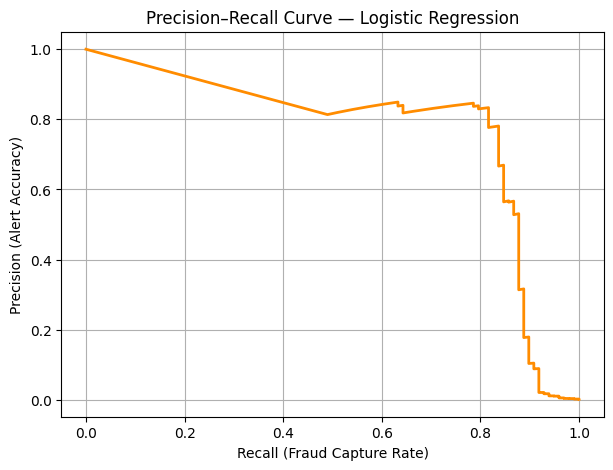

Chosen threshold for 80% recall: 1.0000
Precision at this threshold: 0.8316


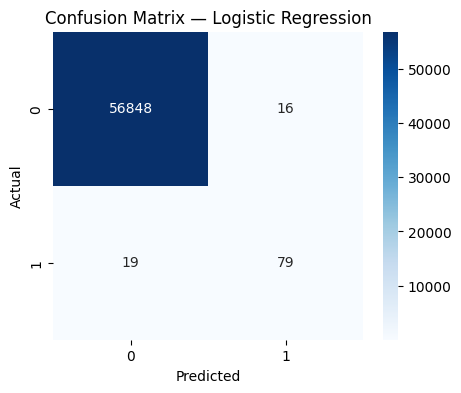

Classification Report:

              precision    recall  f1-score   support

           0     0.9997    0.9997    0.9997     56864
           1     0.8316    0.8061    0.8187        98

    accuracy                         0.9994     56962
   macro avg     0.9156    0.9029    0.9092     56962
weighted avg     0.9994    0.9994    0.9994     56962



In [3]:
# Logistic Regression

# Data Manipulation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning Tools
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Metrics & Evaluation
from sklearn.metrics import (
    precision_recall_curve, 
    confusion_matrix, 
    classification_report, 
    average_precision_score
)

# Load preprocessed data
X = pd.read_csv("X_preprocessed.csv")
Y = pd.read_csv("Y_preprocessed.csv").squeeze()  # convert to Series
print("Loaded preprocessed data:", X.shape)

# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.2, stratify=Y, random_state=42
)
print("Train shape:", X_train.shape, "Test shape:", X_test.shape)

# Logistic Regression
log_reg = LogisticRegression(
    class_weight='balanced',
    max_iter=1000
)
log_reg.fit(X_train, y_train)

#  Predictions & PR-AUC
y_proba_lr = log_reg.predict_proba(X_test)[:, 1]
pr_auc_lr = average_precision_score(y_test, y_proba_lr)
print(f"Logistic Regression PR-AUC: {pr_auc_lr:.4f}")

#  Coefficients
coeffs = pd.Series(log_reg.coef_[0], index=X_train.columns).sort_values(key=abs, ascending=False)
print("Top Logistic Regression Coefficients:\n", coeffs.head(10))

# =========================================
# Notebook 2: Logistic Regression — Evaluation & Visualization
# =========================================


#  Precision-Recall Curve
precision, recall, thresholds = precision_recall_curve(y_test, y_proba_lr)

plt.figure(figsize=(7, 5))
plt.plot(recall, precision, color='darkorange', lw=2)
plt.xlabel("Recall (Fraud Capture Rate)")
plt.ylabel("Precision (Alert Accuracy)")
plt.title("Precision–Recall Curve — Logistic Regression")
plt.grid(True)
plt.show()

#   a threshold for business-driven recall (e.g., 80%)
target_recall = 0.80
idx = np.where(recall >= target_recall)[0][-1]
threshold = thresholds[idx]

print(f"Chosen threshold for {target_recall*100:.0f}% recall: {threshold:.4f}")
print(f"Precision at this threshold: {precision[idx]:.4f}")

# Confusion Matrix at this threshold
y_pred = (y_proba_lr >= threshold).astype(int)
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix — Logistic Regression")
plt.show()

#  Classification Report
print("Classification Report:\n")
print(classification_report(y_test, y_pred, digits=4))

